## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [ ]:
import plotly.express as px

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/pp_gas_emission/gt_2011.csv')
df2 = pd.read_csv('/content/drive/MyDrive/pp_gas_emission/gt_2012.csv')
df3 = pd.read_csv('/content/drive/MyDrive/pp_gas_emission/gt_2013.csv')
df4 = pd.read_csv('/content/drive/MyDrive/pp_gas_emission/gt_2014.csv')
df5 = pd.read_csv('/content/drive/MyDrive/pp_gas_emission/gt_2015.csv')

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df5.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
7383,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


In [ ]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


#Graphs

## Scatter plot for CO

## Heatmap of Dataset

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd



# Compute the correlation matrix
corr_matrix = df.corr()

# Define the heatmap trace
trace = go.Heatmap(z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='Viridis', # or 'Plasma'
                   zmin=-1,
                   zmax=1,
                   colorbar=dict(title='Correlation',tickfont=dict(color='white'),title_font_color ='white'))

# Define the layout
layout = go.Layout(title='Correlation Heatmap',
                   title_font_color='white',
                   xaxis=dict(title=None, tickfont={"color": "white"}),
                   yaxis=dict(title=None, tickfont={"color": "white"}),
                   plot_bgcolor='black',
                   paper_bgcolor='black',
                   hovermode='closest')

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Update the x and y axis tick labels to white color
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))

# Show the figure
pio.show(fig)


##Hisplot

<Axes: xlabel='NOX', ylabel='Count'>

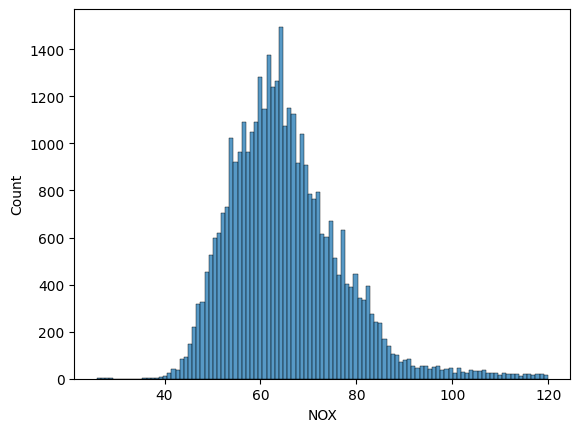

In [ ]:
sns.histplot(data=df['NOX'])

<Axes: xlabel='CO', ylabel='Count'>

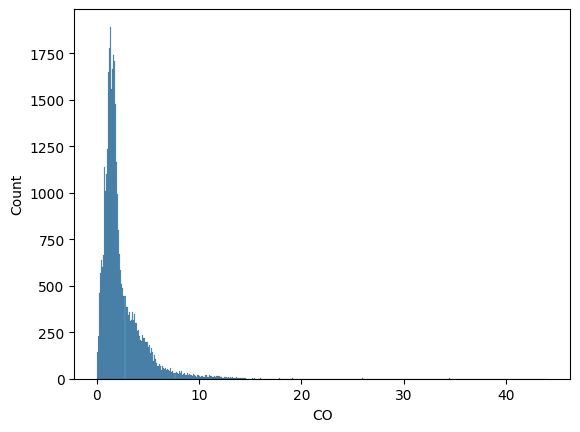

In [ ]:
sns.histplot(data=df['CO'])

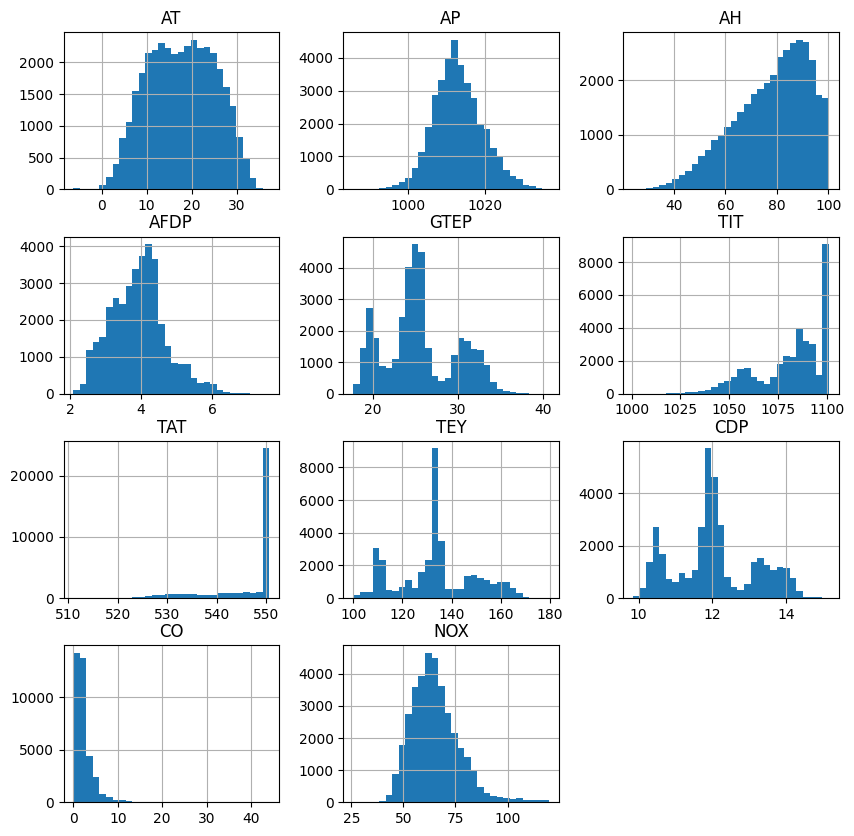

In [ ]:
# create histogram for each variabel to check normality.
df.hist(bins = 30, figsize= (10, 10) )
plt.show()

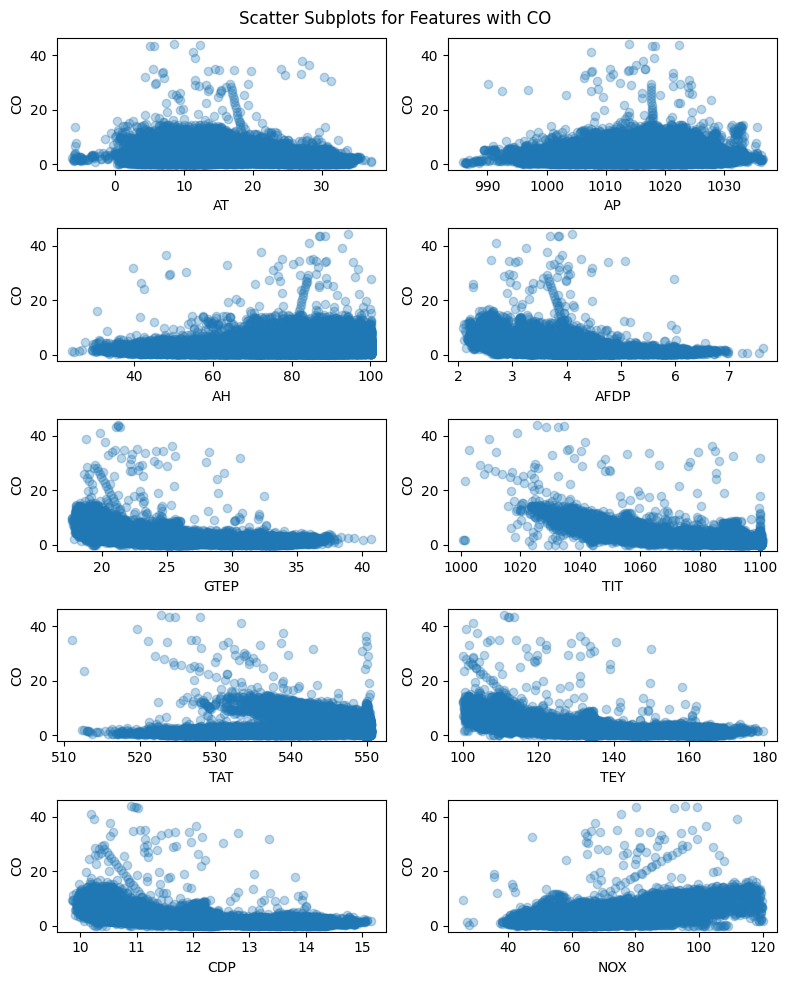

In [ ]:
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Loop through each feature and create a scatter plot with CO
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df[feature], df[target], alpha = 0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)


fig.suptitle('Scatter Subplots for Features with CO')
fig.tight_layout()
# Show the plot
plt.show()

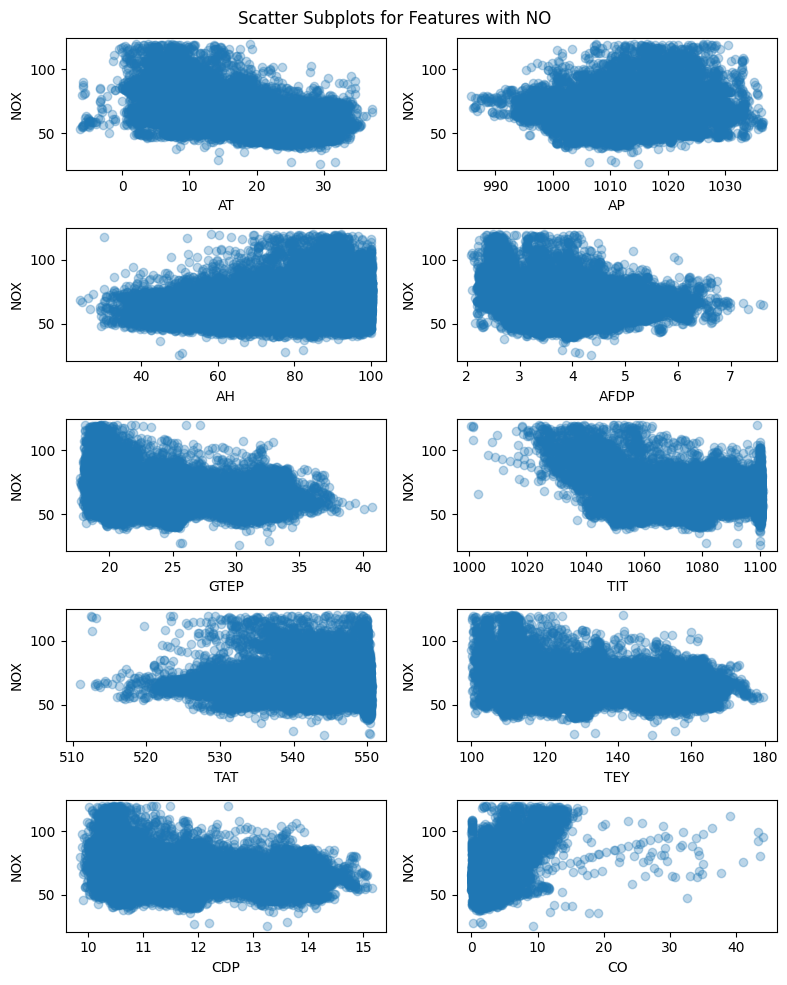

In [ ]:
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Loop through each feature and create a scatter plot with CO
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df[feature], df[target], alpha = 0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)


fig.suptitle('Scatter Subplots for Features with NO')
fig.tight_layout()
# Show the plot
plt.show()

#Models

## Random Forest

###RF-NOx

In [ ]:
regressorRF_NOX = RandomForestRegressor(n_estimators = 100)

# Creating data
X = df.drop(['NOX', 'CO'], axis =1)
y = df[['NOX']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressorRF_NOX.fit(X_train, y_train)
y_pred = regressorRF_NOX.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mare = np.mean(np.abs((y_test.values - y_pred) / y_test.values)) * 100

# Print the results
print("Mean Squared Error(MSE) : ", mse)
print("Root Mean Squared Error(MSE) RMSE: ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-Squared (R2): ", r2)
print("Mean Absolute Relative Error (MARE) for NOX: ", mare)


Mean Squared Error(MSE) :  16.45456542956065
Root Mean Squared Error(MSE) RMSE:  4.056422738024311
Mean Absolute Error (MAE):  2.5868333619164283
R-Squared (R2):  0.8758294243138691
Mean Absolute Relative Error (MARE) for NOX:  18.64474916194114


In [ ]:
import pickle
filename = 'Random_Forest_model_1.sav'
pickle.dump(regressorRF_NOX, open(filename, 'wb'))
regressorRF_NOX = pickle.load(open('Random_Forest_model_1.sav', 'rb'))

###RF-CO


In [ ]:
regressorRF_CO = RandomForestRegressor(n_estimators = 100)

# Creating data
X = df.drop(['NOX', 'CO'], axis =1)
y = df[['CO']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressorRF_CO.fit(X_train, y_train)
y_pred = regressorRF_CO.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mare = np.mean(np.abs((y_test.values - y_pred) / y_test.values)) * 100

# Print the results
print("Mean Squared Error(MSE) : ", mse)
print("Root Mean Squared Error(MSE) RMSE: ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-Squared (R2): ", r2)
print("Mean Absolute Relative Error (MARE) for CO: ", mare)


Mean Squared Error(MSE) :  1.251024027646738
Root Mean Squared Error(MSE) RMSE:  1.1184918540815296
Mean Absolute Error (MAE):  0.49322836858513674
R-Squared (R2):  0.7699324078339445
Mean Absolute Relative Error (MARE) for CO:  257.4946077495471


In [ ]:
import pickle

filename = 'Random_Forest_model_2.sav'
pickle.dump(regressorRF_CO, open(filename, 'wb'))
regressorRF_CO = pickle.load(open('Random_Forest_model_2.sav', 'rb'))

In [ ]:
# Ask user for input values
print("Please enter the following input values:")
AT = float(input("AT: "))
AP = float(input("AP: "))
AH = float(input("AH: "))
AFDP = float(input("AFDP: "))
GTEP = float(input("GTEP: "))
TIT = float(input("TIT: "))
TAT = float(input("TAT: "))
TEY = float(input("TEY: "))
CDP = float(input("CDP: "))

# Create input array for prediction
input_array = np.array([[AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP]])

# Scale input values using the same scaler object used during training
# scaled_input_array = scaler.transform(input_array)

# Reshape input array for compatibility with the model
reshaped_input_array = np.reshape(input_array, (1, 9))

# Make prediction using the trained model
prediction1 = regressorRF_NOX.predict(reshaped_input_array)
prediction2 = regressorRF_CO.predict(reshaped_input_array)
# Print the predicted values

print("Predicted NOX value: ", prediction1)
print("Predicted CO value: ", prediction2)


Please enter the following input values:
AT: 4.2932
AP: 1018.3
AH: 84.235
AFDP: 3.5709
GTEP: 23.951
TIT: 1086.1
TAT: 550.05
TEY: 134.67
CDP: 11.892
Predicted NOX value:  [82.46944]
Predicted CO value:  [0.629497]


## LSTM

###LSTM-CO


In [ ]:
 #Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Split the dataset into features and targets
features = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
targets = df[['CO']]

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 9), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val))


# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mare = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R^2 Score: ", r2)
print("Mean Absolute Relative Error: ", mare)


Epoch 1/150
368/368 [==============================] - 13s 14ms/step - loss: 1.0428 - val_loss: 0.7130
Epoch 2/150
368/368 [==============================] - 3s 9ms/step - loss: 0.7484 - val_loss: 0.6771
Epoch 3/150
368/368 [==============================] - 5s 14ms/step - loss: 0.7192 - val_loss: 0.6482
Epoch 4/150
368/368 [==============================] - 4s 10ms/step - loss: 0.7029 - val_loss: 0.6425
Epoch 5/150
368/368 [==============================] - 4s 10ms/step - loss: 0.6905 - val_loss: 0.6332
Epoch 6/150
368/368 [==============================] - 4s 10ms/step - loss: 0.6834 - val_loss: 0.6265
Epoch 7/150
368/368 [==============================] - 5s 13ms/step - loss: 0.6790 - val_loss: 0.6245
Epoch 8/150
368/368 [==============================] - 3s 9ms/step - loss: 0.6748 - val_loss: 0.6225
Epoch 9/150
368/368 [==============================] - 4s 10ms/step - loss: 0.6658 - val_loss: 0.6151
Epoch 10/150
368/368 [==============================] - 4s 10ms/step - loss: 0.6641

In [ ]:
import pickle
filename = 'LSTM_model.sav'
pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open('LSTM_model.sav', 'rb'))

###LSTM-NOx


In [ ]:
 #Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Split the dataset into features and targets
features = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
targets = df[['NOX']]

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model2 = Sequential()
model2.add(LSTM(64, input_shape=(1, 9), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(64, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(32))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='linear'))

# Compile the model
model2.compile(loss='mean_absolute_error', optimizer='adam')

# Train the model
model2.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mare = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R^2 Score: ", r2)
print("Mean Absolute Relative Error: ", mare)


Epoch 1/150
368/368 [==============================] - 13s 15ms/step - loss: 54.9461 - val_loss: 47.4155
Epoch 2/150
368/368 [==============================] - 3s 9ms/step - loss: 42.5581 - val_loss: 37.4005
Epoch 3/150
368/368 [==============================] - 3s 9ms/step - loss: 32.8036 - val_loss: 27.7783
Epoch 4/150
368/368 [==============================] - 4s 12ms/step - loss: 23.3341 - val_loss: 18.5465
Epoch 5/150
368/368 [==============================] - 4s 10ms/step - loss: 15.4880 - val_loss: 12.0279
Epoch 6/150
368/368 [==============================] - 4s 10ms/step - loss: 11.5206 - val_loss: 9.5040
Epoch 7/150
368/368 [==============================] - 3s 9ms/step - loss: 10.2503 - val_loss: 8.8213
Epoch 8/150
368/368 [==============================] - 5s 13ms/step - loss: 10.0005 - val_loss: 8.6941
Epoch 9/150
368/368 [==============================] - 4s 10ms/step - loss: 9.9543 - val_loss: 8.6728
Epoch 10/150
368/368 [==============================] - 3s 9ms/step - l

In [ ]:
filename = 'LSTM_model_2.sav'
pickle.dump(model2, open(filename, 'wb'))
model2 = pickle.load(open('LSTM_model_2.sav', 'rb'))

In [ ]:
import numpy as np

# Get user input for feature values
at = float(input("Enter value for AT: "))
ap = float(input("Enter value for AP: "))
ah = float(input("Enter value for AH: "))
afdp = float(input("Enter value for AFDP: "))
gtep = float(input("Enter value for GTEP: "))
tit = float(input("Enter value for TIT: "))
tat = float(input("Enter value for TAT: "))
tey = float(input("Enter value for TEY: "))
cdp = float(input("Enter value for CDP: "))

# Create input data as a numpy array
input_data = np.array([[at, ap, ah, afdp, gtep, tit, tat, tey, cdp]])

# Scale the input data using the StandardScaler
input_data = scaler.transform(input_data)

# Reshape the input data for LSTM model
input_data = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))

# Make predictions on the input data
predictions_1 = model.predict(input_data)
predictions_2 = model2.predict(input_data)
# Print the predicted values
print("Predicted CO value:", predictions_1)
print("Predicted NOX value:", predictions_2)


Enter value for AT: 4.2932
Enter value for AP: 1018.3
Enter value for AH: 84.235
Enter value for AFDP: 3.5709
Enter value for GTEP: 23.951
Enter value for TIT: 1086.1
Enter value for TAT: 550.05
Enter value for TEY: 134.67
Enter value for CDP: 11.892
1/1 [==============================] - 1s 1s/step
Predicted CO value: [[0.7006731]]
Predicted NOX value: [[84.33989]]


##SVR-CO


In [ ]:
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
y = df['CO']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVR model
regressor = SVR(kernel='rbf', C=1.0)
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mare = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination (R^2):", r2)
print("MAE", mae)
print("Mean Absolute Relative Error (MARE) for CO: ", mare)


Mean Squared Error: 1.7641484854296439
Root Mean Squared Error: 1.3282125151607493
Coefficient of Determination (R^2): 0.6755670672211886
MAE 0.5741421193467093
Mean Absolute Relative Error (MARE) for CO:  113.17418983072567


In [ ]:
filename = 'SVR-CO_model.sav'
pickle.dump(regressor, open(filename, 'wb'))
SVR_C = pickle.load(open('SVR-CO_model.sav', 'rb'))

In [ ]:
import numpy as np

# Ask the user to input values for the input features
AT = float(input("Enter the value for AT: "))
AP = float(input("Enter the value for AP: "))
AH = float(input("Enter the value for AH: "))
AFDP = float(input("Enter the value for AFDP: "))
GTEP = float(input("Enter the value for GTEP: "))
TIT = float(input("Enter the value for TIT: "))
TAT = float(input("Enter the value for TAT: "))
TEY = float(input("Enter the value for TEY: "))
CDP = float(input("Enter the value for CDP: "))

# Put the input features into a numpy array
new_data = np.array([[AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP]])

# Normalize the new data using the same scaler used for the training data
new_data_normalized = scaler.transform(new_data)

# Use the trained SVR model to make a prediction on the new data
prediction = regressor.predict(new_data_normalized)[0]

# Print the prediction
print("Predicted CO level:", prediction)


Enter the value for AT: 4.2932
Enter the value for AP: 1018.3
Enter the value for AH: 84.235
Enter the value for AFDP: 3.5709
Enter the value for GTEP: 23.951
Enter the value for TIT: 1086.1
Enter the value for TAT: 550.05
Enter the value for TEY: 134.67
Enter the value for CDP: 11.892
Predicted CO level: 1.4698183402536


##SVR-NOX


In [ ]:
# Select the columns for the input features (X) and target variables (y)
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
y = df['NOX']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVR model
regressor = SVR(kernel='rbf', C=40)
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mare = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination (R^2):", r2)
print("MAE", mae)
print("Mean Absolute Relative Error (MARE) for NOx: ", mare)


Mean Squared Error: 25.04482889479822
Root Mean Squared Error: 5.004480881649786
Coefficient of Determination (R^2): 0.8110049861152258
MAE 3.235065390470192
Mean Absolute Relative Error (MARE) for NOx:  4.938704369153105
